<a href="https://colab.research.google.com/github/Neha609/Machine-Learning-Projects/blob/gh-pages/Candidate_Hiring_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

----
**Overview:** 
In this assignment you will predict candidates hiring likelihood. The dataset provided contains attributes for 690 candidates. 

The anonymized fields included are:

C1: b, a.

C2: continuous.

C3: continuous.

C4: u, y, l, t.

C5: g, p, gg.

C6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.

C7: v, h, bb, j, n, z, dd, ff, o.

C8: continuous.

C9: t, f.

C10: t, f.

C11: continuous.

C12: t, f.

C13: g, p, s.

C14: continuous.

C15: continuous.

Hired Flag: 1,0

For this assignment, build a classification model predicting whether candidate will get hired or not using R or Python.

**1. Data Collection**

----

In [1]:
# importing requied libraries
import os

In [2]:
# creating folder DataSource to keep the data 
if os.path.exists(os.path.join(os.getcwd(),'DataSource')):
  pass
else:
  os.makedirs(os.path.join(os.getcwd(),'DataSource'))


In [3]:
# copying the raw data file from google drive to DataSource folder
!cp "/content/drive/MyDrive/Hiring_Challenge.csv" /content/DataSource/

**2. Data Sampling**

----

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [5]:
#loading data fom csv file to variable dataset
dataset = pd.read_csv('/content/drive/MyDrive/Accenture Assignment/Hiring_Challenge.csv')

In [6]:
#printing top 5 record
dataset.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [7]:
# checking shape of dataset
dataset.shape

(690, 16)

In [8]:
#Checking the list of columns present in dataset
ColList = dataset.columns
ColList

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Hired'],
      dtype='object')

**3. Handling Missing Values**

----

In [9]:
#Importing required libraries
import scipy.stats as stat
import pylab

In [10]:
#Checking the percentage of NaN values present in each feature
#Also making list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

In [11]:
## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  '% missing values')
#No null values found then it will not print anything

---Numerical features

In [12]:
#Now listing all numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['Hired']]
#Adding C2 and C14 in numerical category because they are numerical columns but because of ? present in some of column values
#there data type is showing as object.
numerical_features = numerical_features+['C2','C14']
numerical_features

['C3', 'C8', 'C11', 'C15', 'C2', 'C14']

In [13]:
#Checking numerical features
dataset[numerical_features].head()

,C3,C8,C11,C15,C2,C14
0,0.000,1.25,1,0,30.83,202
1,4.460,3.04,6,560,58.67,43
2,0.500,1.50,0,824,24.5,280
3,1.540,3.75,5,3,27.83,100
4,5.625,1.71,0,0,20.17,120


In [14]:
#Creating a function to draw plots which contains two subplots to check distribution of data and outliers as well
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

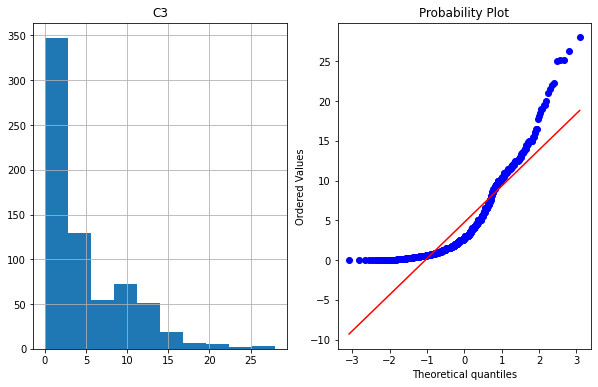

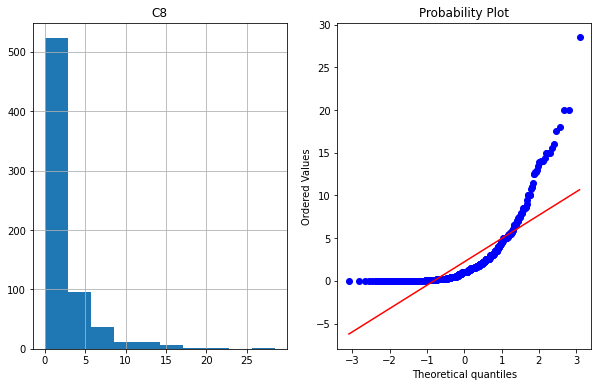

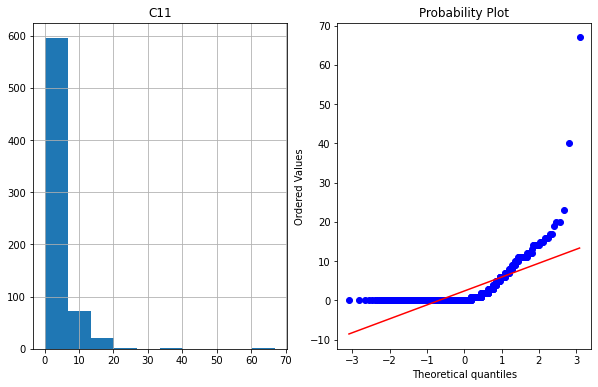

In [15]:
#First checking four features because as of now getting problem in two features
for feature in numerical_features[:3]:
  plot_data(dataset,feature)

In [16]:
#Now replacing missing values which contains ? in numerical columns via median value.
dataset['C14']= dataset['C14'].replace('?',dataset[feature].median()).astype(float)
dataset['C2'] = dataset['C2'].replace('?',dataset[feature].median()).astype(float)

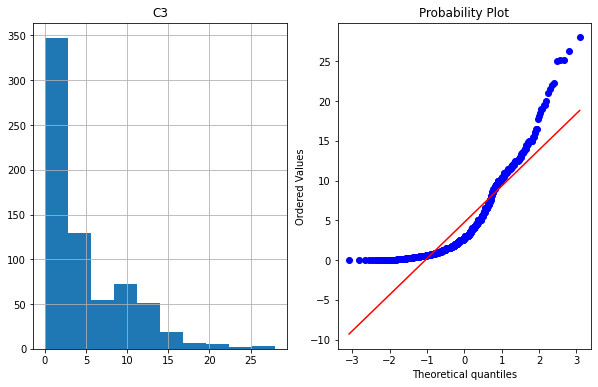

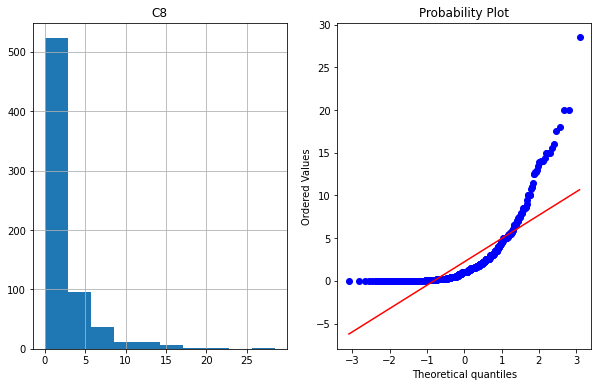

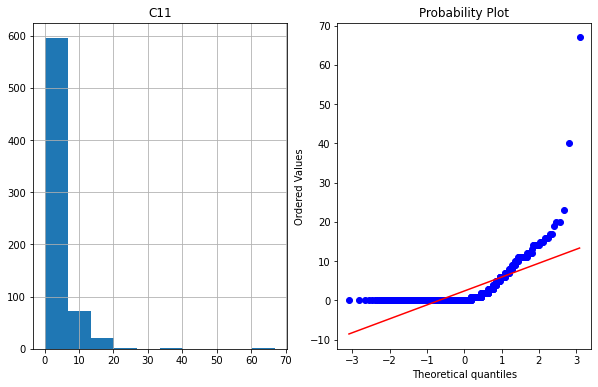

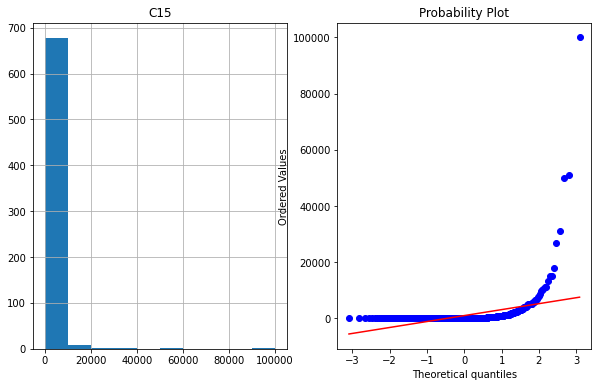

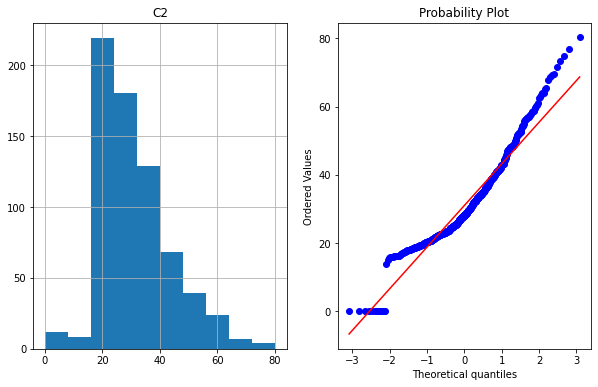

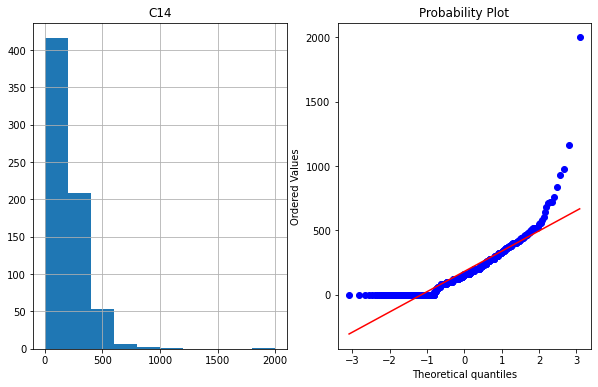

In [17]:
#Again checking the distribution and outliers via plot in all numerical columns
for feature in numerical_features:
  dataset[feature] = dataset[feature].replace('?',dataset[feature].median())
  plot_data(dataset,feature)

---Categorical Features

In [18]:
#Making the list of categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O' if feature not in ['C2','C14']]
categorical_features

['C1', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C12', 'C13']

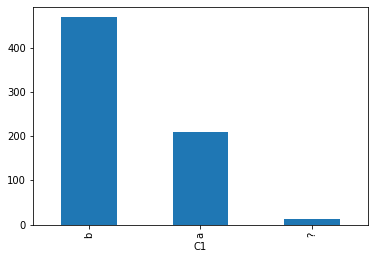

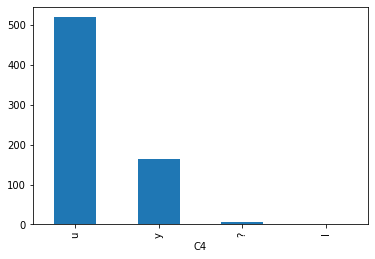

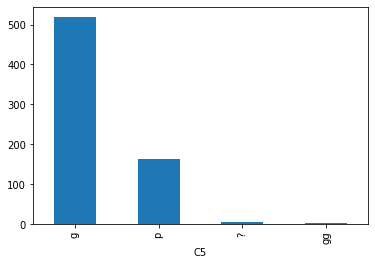

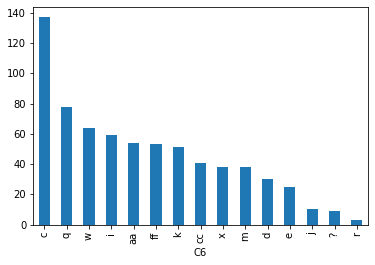

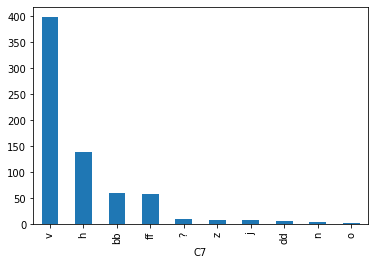

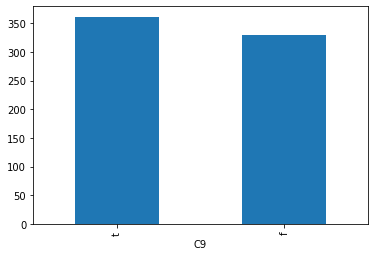

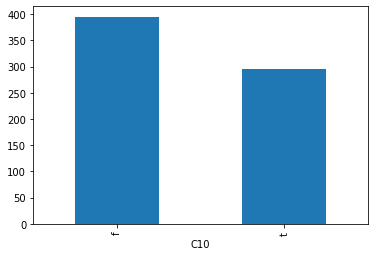

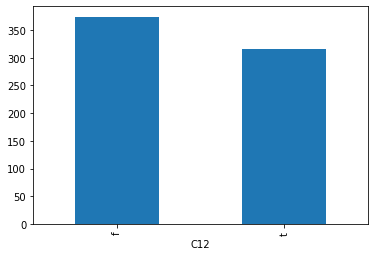

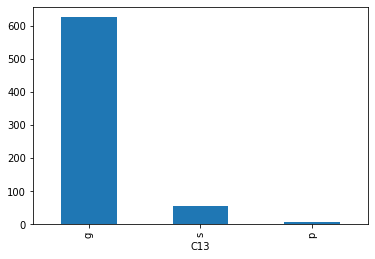

In [19]:
#Drawing plot to check the count of values in each feature
for feature in categorical_features:
  dataset.groupby([feature])[feature].count().sort_values(ascending=False).plot.bar()
  plt.show()

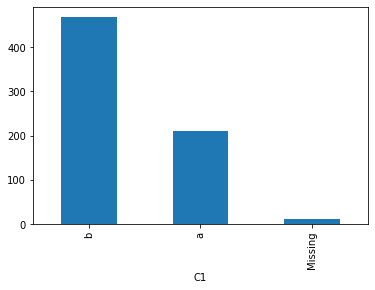

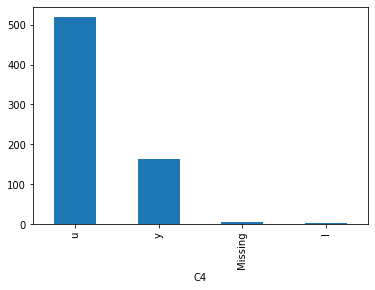

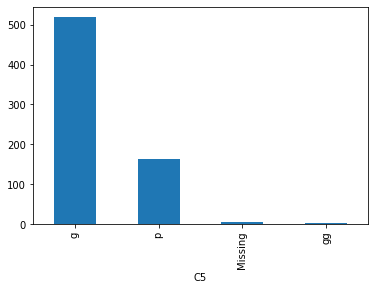

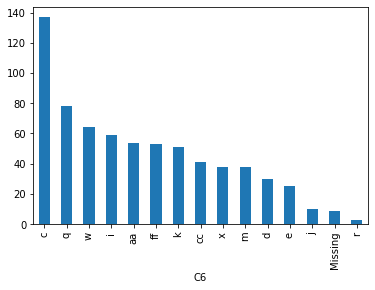

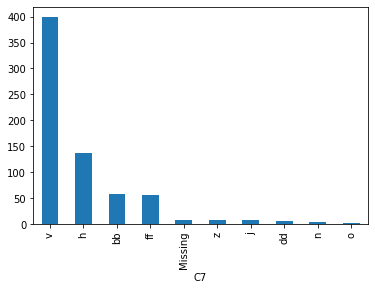

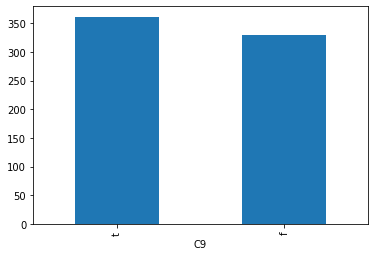

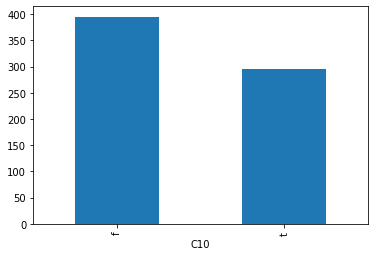

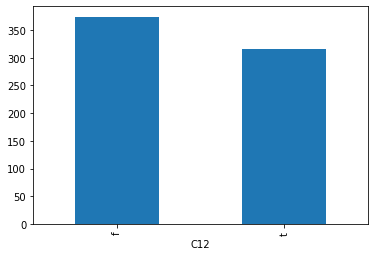

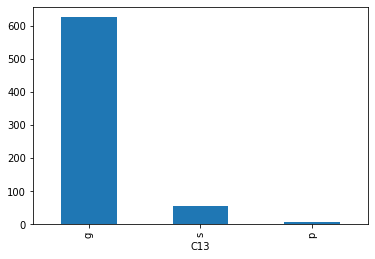

In [20]:
#Now replacing '?' via 'Missing' variable and again plotting bar graph to check count of values in each feature
for feature in categorical_features:
  dataset[feature]= dataset[feature].replace('?','Missing')
  dataset.groupby([feature])[feature].count().sort_values(ascending=False).plot.bar()
  plt.show()

**4. Outlier Handling**

----

In [21]:
#First performing on numerical features
numerical_features

['C3', 'C8', 'C11', 'C15', 'C2', 'C14']

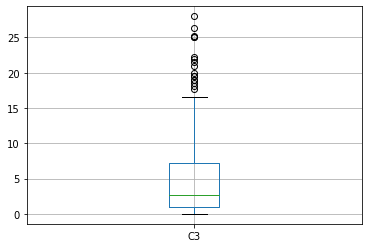

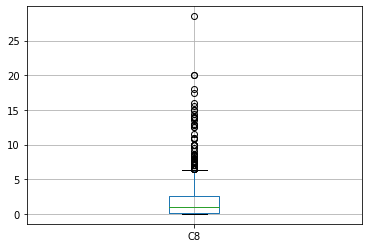

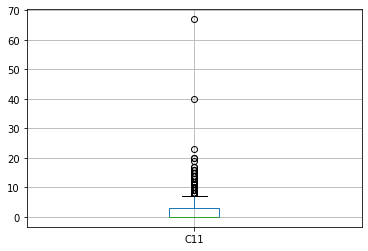

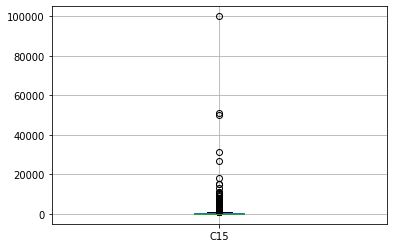

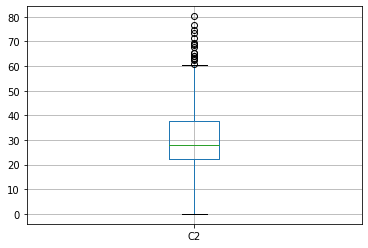

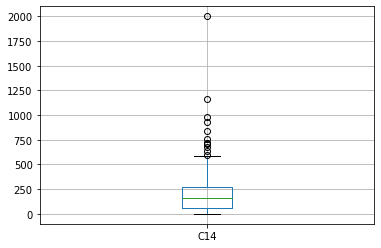

In [22]:
#Drawing Boxplot to check whether outliers are present or not in each feature
for feature in numerical_features:
  figure=dataset.boxplot(column=feature)
  plt.show()

In [23]:
#Finding upper stream and lower stream values and then replacing ouliers via those values.
for feature in numerical_features:
  IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
  lower_bridge=dataset[feature].quantile(0.25)-(IQR*3)
  upper_bridge=dataset[feature].quantile(0.75)+(IQR*3)
  dataset.loc[dataset[feature]>=upper_bridge,feature]=upper_bridge
  dataset.loc[dataset[feature]<=lower_bridge,feature]=lower_bridge
  print(upper_bridge,lower_bridge)

25.83 -17.6225
10.004999999999999 -7.215
12.0 -9.0
1582.0 -1186.5
83.50999999999998 -23.36249999999998
908.0 -576.0


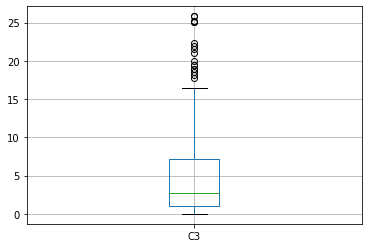

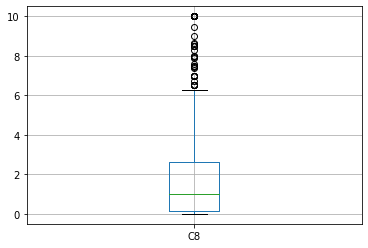

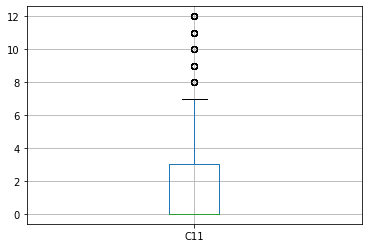

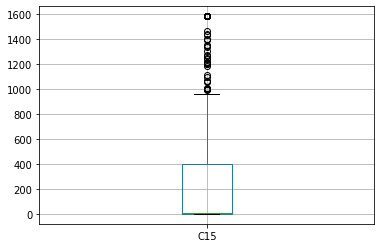

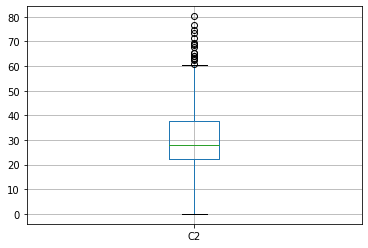

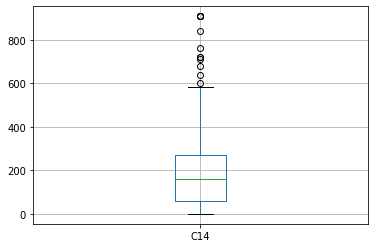

In [24]:
#Now after handling outliers values again drawing Boxplot to check the difference
for feature in numerical_features:
  figure=dataset.boxplot(column=feature)
  plt.show()

**5. Numerical Features**

----

--- Discrete Feature

In [25]:
#creating list of Dicrete feature
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<15]

In [26]:
#Checking the discrete columns
discrete_feature

['C11']

In [27]:
#Checking values of descrete features
dataset[discrete_feature].head()

,C11
0,1.0
1,6.0
2,0.0
3,5.0
4,0.0


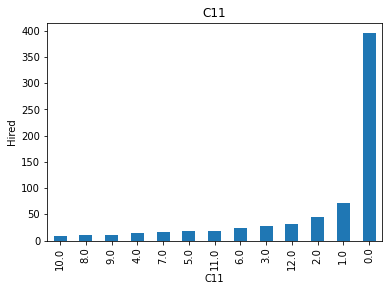

In [28]:
#Checking relationship between Discrete feature and output feature
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Hired'].count().sort_values(ascending=True).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Hired')
    plt.title(feature)
    plt.show()

--- Continues Feature

In [29]:
#list of all continuous feature
continuous_feature=[feature for feature in numerical_features]
continuous_feature

['C3', 'C8', 'C11', 'C15', 'C2', 'C14']

In [30]:
#checking top continues features
dataset[continuous_feature].head()

,C3,C8,C11,C15,C2,C14
0,0.000,1.25,1.0,0.0,30.83,202.0
1,4.460,3.04,6.0,560.0,58.67,43.0
2,0.500,1.50,0.0,824.0,24.50,280.0
3,1.540,3.75,5.0,3.0,27.83,100.0
4,5.625,1.71,0.0,0.0,20.17,120.0


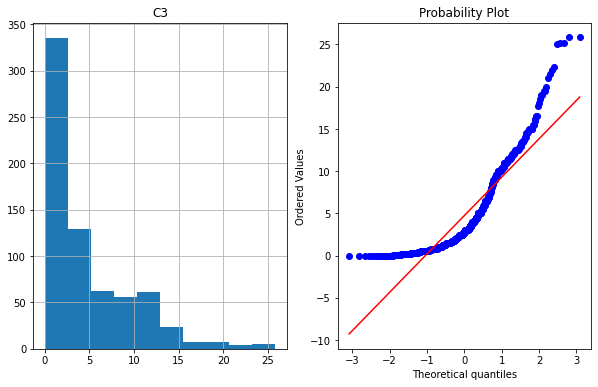

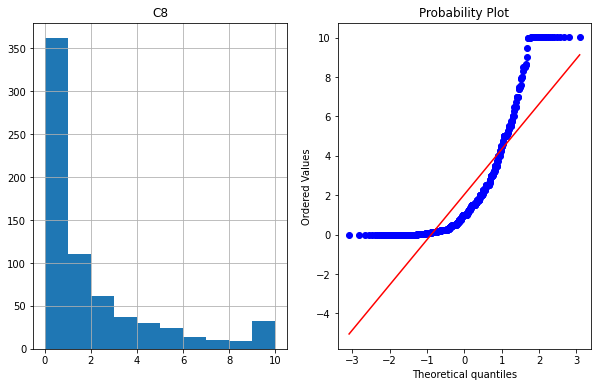

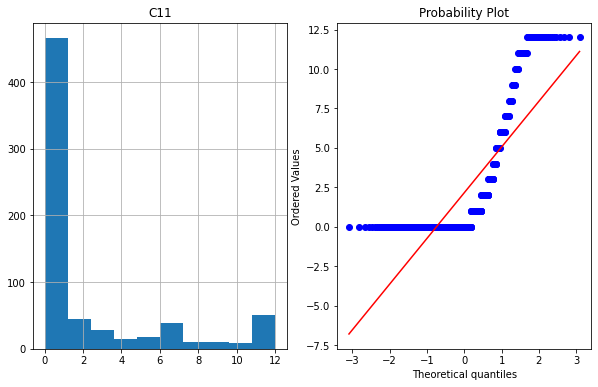

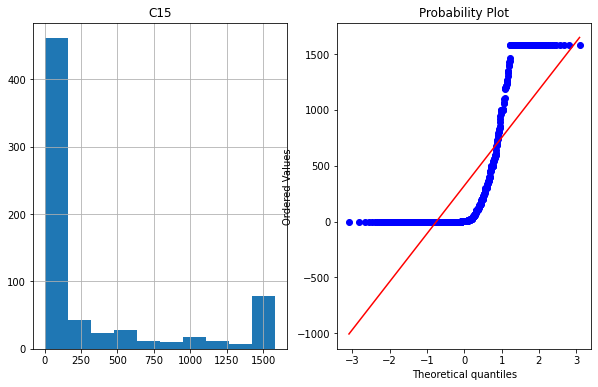

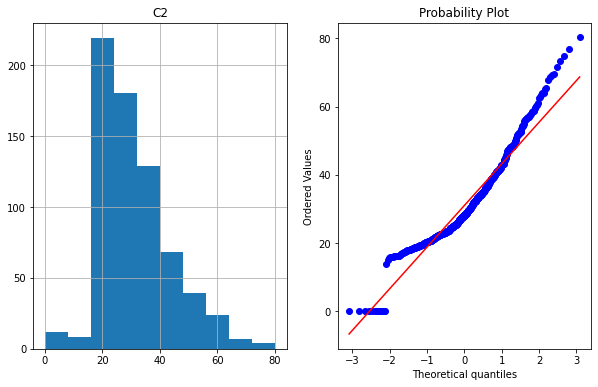

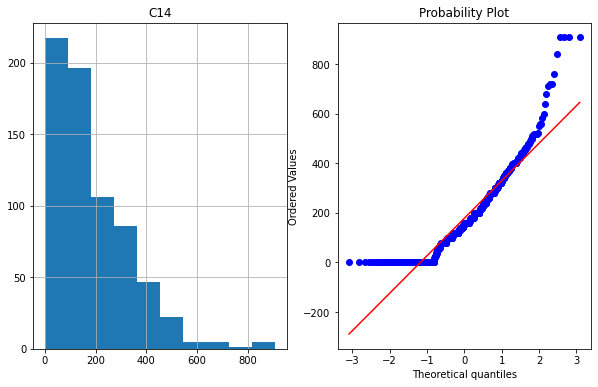

In [31]:
#Checking the distribution and outliers via plot in all numerical columns before boxcox transformation
for feature in numerical_features:
  plot_data(dataset,feature)

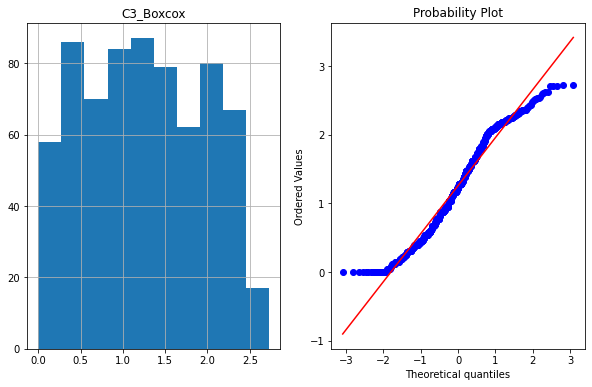

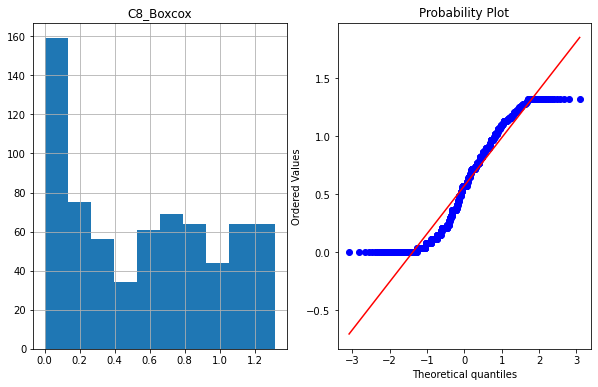

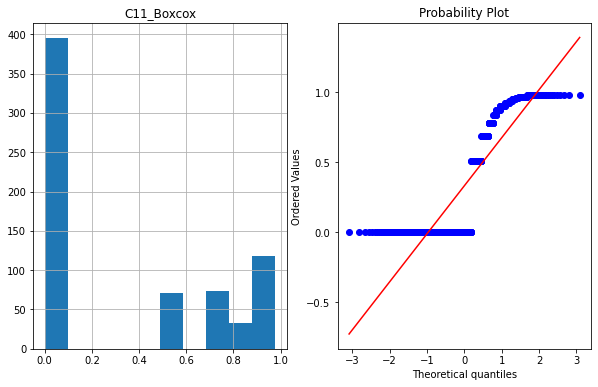

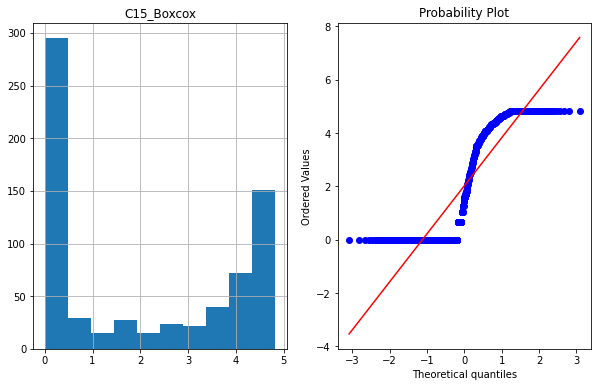

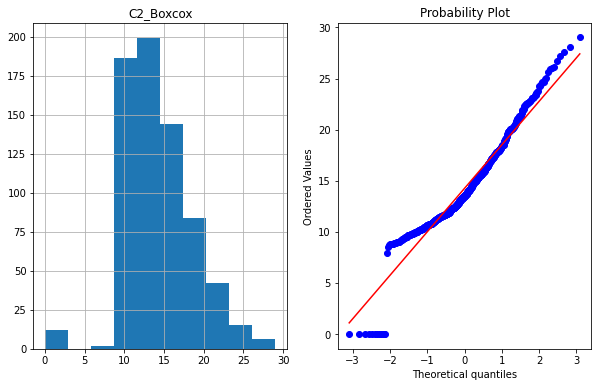

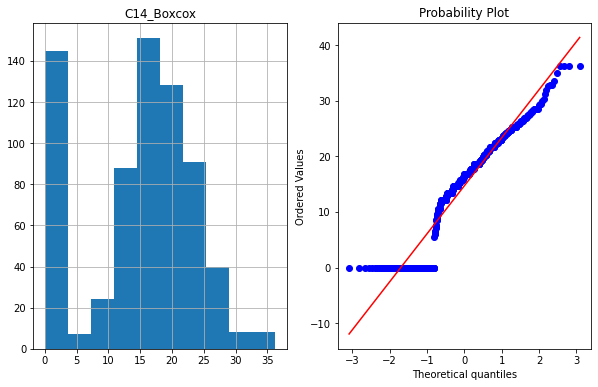

In [32]:
#Performing Boxcox transformation in continues features and plotting again to check distribution and outliers
for feature in continuous_feature:
  dataset[feature + '_Boxcox'],parameters=stat.boxcox(dataset[feature]+1)
  plot_data(dataset,feature + '_Boxcox')

In [33]:
#Checking head rows of all features
dataset.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired,C3_Boxcox,C8_Boxcox,C11_Boxcox,C15_Boxcox,C2_Boxcox,C14_Boxcox
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1,0.000000,0.651655,0.511086,0.000000,14.459394,18.662886
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1,1.538297,0.968395,0.899956,4.380713,23.148977,8.930217
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1,0.395921,0.716597,0.000000,4.552038,12.192188,21.626212
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1,0.882740,1.039161,0.872765,1.273331,13.403996,13.473800
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1,1.694811,0.763784,0.000000,0.000000,10.540875,14.679955


**6. Categorical Features**

----

In [34]:
#make the list of categorical feature
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O' if feature not in ['C2','C14']]

In [35]:
# checking list of catrgorical fearture
categorical_features

['C1', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C12', 'C13']

In [36]:
#Printing count of all unique values in all categorical feature
for feature in categorical_features:
  print('{} - {}'.format(feature,len(dataset[feature].unique())))

C1 - 3
C4 - 4
C5 - 4
C6 - 15
C7 - 10
C9 - 2
C10 - 2
C12 - 2
C13 - 3


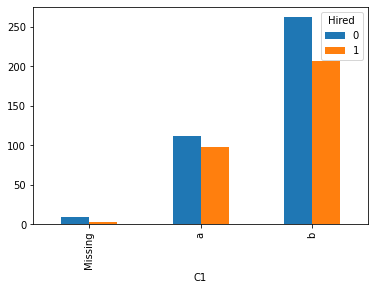

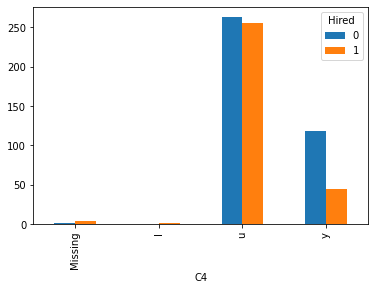

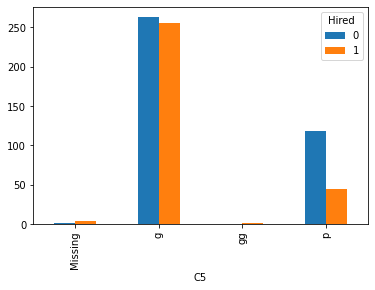

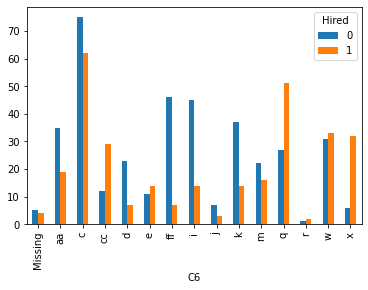

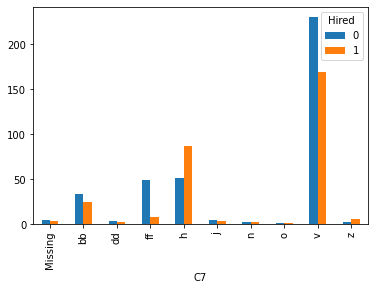

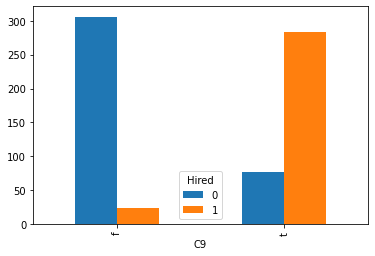

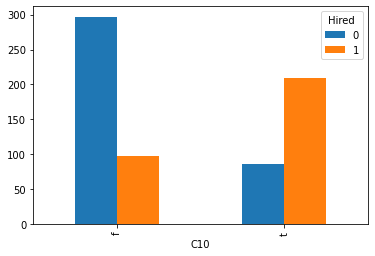

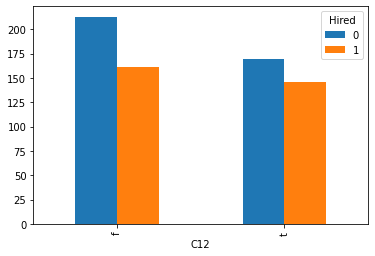

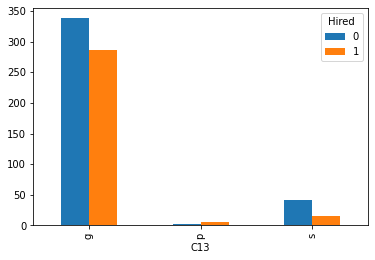

In [37]:
#Plotting number of input feature values vs Hired/Non Hired category
for feature in categorical_features:
  data = dataset.copy()
  pd.crosstab(data[feature],data.Hired).plot.bar()
  plt.show()

In [38]:
#Performing Binary Encoding with categorical data
for feature in categorical_features:
  ccategoryData = dataset[feature].value_counts()
  for categories in ccategoryData.index:
    if ccategoryData[categories]>10:
      dataset[feature+'-'+categories]=np.where(dataset[feature]==categories,1,0)

In [39]:
#visualizing top data after Binary Encoding
dataset.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired,C3_Boxcox,C8_Boxcox,C11_Boxcox,C15_Boxcox,C2_Boxcox,C14_Boxcox,C1-b,C1-a,C1-Missing,C4-u,C4-y,C5-g,C5-p,C6-c,C6-q,C6-w,C6-i,C6-aa,C6-ff,C6-k,C6-cc,C6-m,C6-x,C6-d,C6-e,C7-v,C7-h,C7-bb,C7-ff,C9-t,C9-f,C10-f,C10-t,C12-f,C12-t,C13-g,C13-s
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1,0.000000,0.651655,0.511086,0.000000,14.459394,18.662886,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1,1.538297,0.968395,0.899956,4.380713,23.148977,8.930217,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1,0.395921,0.716597,0.000000,4.552038,12.192188,21.626212,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1,0.882740,1.039161,0.872765,1.273331,13.403996,13.473800,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1,1.694811,0.763784,0.000000,0.000000,10.540875,14.679955,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1


**7. Feature Scaling**

----

In [40]:
#Importing required library for feature scaling 
from sklearn.preprocessing import StandardScaler

In [41]:
#Initializing standard scalar method and fitting that into our feature
scaler=StandardScaler()
df_scaled=scaler.fit_transform(dataset.iloc[:,16:])


(array([103.,  56.,  28.,  47.,  20.,  36.,  14.,  20.,  39.,  22.,  37.,
         32.,  23.,  41.,  25.,  19.,  26.,  38.,  19.,  45.]),
 array([-1.33942423, -1.1851609 , -1.03089756, -0.87663423, -0.72237089,
        -0.56810756, -0.41384422, -0.25958089, -0.10531756,  0.04894578,
         0.20320911,  0.35747245,  0.51173578,  0.66599912,  0.82026245,
         0.97452579,  1.12878912,  1.28305245,  1.43731579,  1.59157912,
         1.74584246]),
 <a list of 20 Patch objects>)

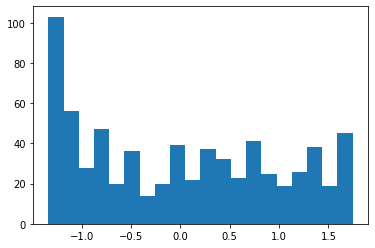

In [42]:
#Ploting second scaled feature
plt.hist(df_scaled[:,1],bins=20)

**8. Feature Selection**

----

In [43]:
#import required libraries
from sklearn.feature_selection import mutual_info_classif

In [44]:
#Creating dataframe with scaled features and also including output feature
dataFrame =pd.DataFrame(df_scaled,columns=dataset.columns.drop(ColList))
dataFrame["Hired"] =dataset['Hired']

In [45]:
#Visualizing dataframe
dataFrame.head()

,C3_Boxcox,C8_Boxcox,C11_Boxcox,C15_Boxcox,C2_Boxcox,C14_Boxcox,C1-b,C1-a,C1-Missing,C4-u,C4-y,C5-g,C5-p,C6-c,C6-q,C6-w,C6-i,C6-aa,C6-ff,C6-k,C6-cc,C6-m,C6-x,C6-d,C6-e,C7-v,C7-h,C7-bb,C7-ff,C9-t,C9-f,C10-f,C10-t,C12-f,C12-t,C13-g,C13-s,Hired
0,-1.773737,0.184903,0.447088,-1.001426,0.047578,0.439374,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,0.919195,-0.919195,0.322490,-0.300079,1
1,0.395900,0.925809,1.417314,1.163627,2.040504,-0.642614,-1.451933,1.511858,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,2.801099,-0.319744,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,-1.170954,2.0,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,0.919195,-0.919195,0.322490,-0.300079,1
2,-1.215324,0.336812,-0.828062,1.248300,-0.472398,0.768810,-1.451933,1.511858,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,2.801099,-0.319744,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,-1.170954,2.0,-0.305782,-0.300079,0.95465,-0.95465,0.864196,-0.864196,0.919195,-0.919195,0.322490,-0.300079,1
3,-0.528707,1.091340,1.349472,-0.372116,-0.194474,-0.137500,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,-1.087908,1.087908,0.322490,-0.300079,1
4,0.616649,0.447191,-0.828062,-1.001426,-0.851121,-0.003411,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,0.864196,-0.864196,0.919195,-0.919195,-3.100868,3.332456,1


In [46]:
#Using method mutual_info_classif to check how much information we are getting from our features
mutual_info=mutual_info_classif(dataFrame.iloc[:,:-1],dataFrame.iloc[:,-1])
mutual_data=pd.Series(mutual_info,index=dataset.columns.drop(ColList))
mutual_data.sort_values(ascending=False)

C9-f          0.291785
C9-t          0.288269
C11_Boxcox    0.155031
C15_Boxcox    0.111277
C10-t         0.093308
C10-f         0.090760
C8_Boxcox     0.069065
C5-p          0.054624
C14_Boxcox    0.047926
C6-e          0.042515
C7-ff         0.041800
C4-u          0.032804
C1-a          0.032110
C7-h          0.029130
C6-d          0.016584
C6-ff         0.014753
C13-s         0.014144
C6-x          0.013302
C6-i          0.011235
C6-cc         0.010955
C2_Boxcox     0.010823
C1-b          0.006853
C7-v          0.006570
C3_Boxcox     0.004831
C6-aa         0.004642
C13-g         0.001336
C7-bb         0.001153
C6-c          0.000312
C12-t         0.000000
C12-f         0.000000
C6-k          0.000000
C1-Missing    0.000000
C4-y          0.000000
C5-g          0.000000
C6-q          0.000000
C6-w          0.000000
C6-m          0.000000
dtype: float64

In [47]:
#Now selecting only those features in which we are getting higher information gain
selectedColumns = mutual_data.sort_values(ascending=False).head(28).index
selectedColumns

Index(['C9-f', 'C9-t', 'C11_Boxcox', 'C15_Boxcox', 'C10-t', 'C10-f',
       'C8_Boxcox', 'C5-p', 'C14_Boxcox', 'C6-e', 'C7-ff', 'C4-u', 'C1-a',
       'C7-h', 'C6-d', 'C6-ff', 'C13-s', 'C6-x', 'C6-i', 'C6-cc', 'C2_Boxcox',
       'C1-b', 'C7-v', 'C3_Boxcox', 'C6-aa', 'C13-g', 'C7-bb', 'C6-c'],
      dtype='object')

In [48]:
#Now droping all the features from dataframe which are not selected during information gain 
for feature in dataFrame.columns:
  if feature not in selectedColumns or feature in ['Hired']:
    dataFrame.drop([feature],axis=1)

In [49]:
#Visualizing Dataframe
dataFrame.head()

,C3_Boxcox,C8_Boxcox,C11_Boxcox,C15_Boxcox,C2_Boxcox,C14_Boxcox,C1-b,C1-a,C1-Missing,C4-u,C4-y,C5-g,C5-p,C6-c,C6-q,C6-w,C6-i,C6-aa,C6-ff,C6-k,C6-cc,C6-m,C6-x,C6-d,C6-e,C7-v,C7-h,C7-bb,C7-ff,C9-t,C9-f,C10-f,C10-t,C12-f,C12-t,C13-g,C13-s,Hired
0,-1.773737,0.184903,0.447088,-1.001426,0.047578,0.439374,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,0.919195,-0.919195,0.322490,-0.300079,1
1,0.395900,0.925809,1.417314,1.163627,2.040504,-0.642614,-1.451933,1.511858,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,2.801099,-0.319744,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,-1.170954,2.0,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,0.919195,-0.919195,0.322490,-0.300079,1
2,-1.215324,0.336812,-0.828062,1.248300,-0.472398,0.768810,-1.451933,1.511858,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,2.801099,-0.319744,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,-1.170954,2.0,-0.305782,-0.300079,0.95465,-0.95465,0.864196,-0.864196,0.919195,-0.919195,0.322490,-0.300079,1
3,-0.528707,1.091340,1.349472,-0.372116,-0.194474,-0.137500,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,-1.157144,1.157144,-1.087908,1.087908,0.322490,-0.300079,1
4,0.616649,0.447191,-0.828062,-1.001426,-0.851121,-0.003411,0.688737,-0.661438,-0.133038,0.574003,-0.556146,0.574003,-0.556146,-0.497734,-0.357003,3.127499,-0.305782,-0.291386,-0.288448,-0.282511,-0.251345,-0.241417,-0.241417,-0.213201,-0.193892,0.854004,-0.5,-0.305782,-0.300079,0.95465,-0.95465,0.864196,-0.864196,0.919195,-0.919195,-3.100868,3.332456,1


**9. Model Selection, Prediction and Evaluation**

----


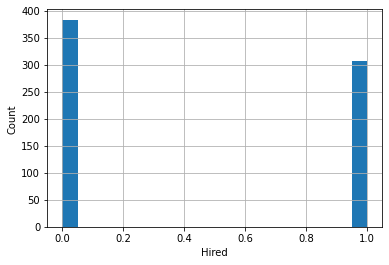

In [50]:
#Let's Visualize our dataset again focusing on Output feature which shows our data is balanced dataset
dataset['Hired'].hist(bins=20)
plt.xlabel('Hired')
plt.ylabel('Count')
plt.show()

In [51]:
#Let's check count of hired and non hired feature set counts
dataset['Hired'].value_counts()

0    383
1    307
Name: Hired, dtype: int64

In [52]:
#As our data is balanced so we do not need to move ensemble Learning techniques
#Importing Logistic Regresion Classifier
from sklearn.linear_model import LogisticRegression
#Importing model evaluation matrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Importing train_test_split module to split dataset into test and train dataset
from sklearn.model_selection import train_test_split

In [53]:
# spliting into train and test set in 70 and 30 percent ratio
X_train,X_test,y_train,y_test=train_test_split(dataFrame.iloc[:,:-1],dataFrame.iloc[:,-1],test_size=0.3,random_state=0)

In [54]:
#Initializing Logistic Regression model
log_class=LogisticRegression()

In [55]:
#Fitting traing data into our logistic model
log_class.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Predicting output with testing dataset
y_pred=log_class.predict(X_test)

In [57]:
#Checking prediction with confusion matrix
print(confusion_matrix(y_test,y_pred))
#Checking our model accuracy
print(accuracy_score(y_test,y_pred))
#Checking classification report
print(classification_report(y_test,y_pred))

[[104  13]
 [ 17  73]]
0.855072463768116
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       117
           1       0.85      0.81      0.83        90

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.86      0.85       207



In [58]:
#Importing another classifier KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
#Initializing classifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Fiting training data into clasifier
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
#Predicting output with testing dataset
y_pred=log_class.predict(X_test)

In [61]:
#Checking prediction with confusion matrix
print(confusion_matrix(y_test,y_pred))
#Checking our model accuracy
print(accuracy_score(y_test,y_pred))
#Checking classification report
print(classification_report(y_test,y_pred))

[[104  13]
 [ 17  73]]
0.855072463768116
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       117
           1       0.85      0.81      0.83        90

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.86      0.85       207



In [62]:
#Importing another classifier RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
#Initializing classifier
classifier=RandomForestClassifier()
#Fiting training data into clasifier
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
#Predicting output with testing dataset
y_pred=classifier.predict(X_test)

In [65]:
#Checking prediction with confusion matrix
print(confusion_matrix(y_test,y_pred))
#Checking our model accuracy
print(accuracy_score(y_test,y_pred))
#Checking classification report
print(classification_report(y_test,y_pred))

[[104  13]
 [ 18  72]]
0.8502415458937198
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.85      0.80      0.82        90

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.85       207
weighted avg       0.85      0.85      0.85       207

